In [75]:
# Following tutorial 
# https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf

import numpy as np 
import matplotlib.pyplot as plt 

In [76]:
# Generating input dataset
# linspace Return evenly spaced numbers over a specified interval.
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
input = np.linspace(-10, 10, 100)
input

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

Text(0.5, 1.0, 'Sigmoid Function')

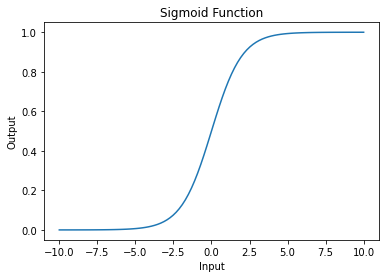

In [77]:
# Sigmoid Function
# This function converts our output values between 0 and 1
def sigmoid(x): 
    return 1/(1+np.exp(-x))

output = sigmoid(input)

plt.plot(input, output)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Function")

# Building a Perceptron


In [78]:
# Define some input features -> Creating the logical OR gate
input_features = np.array([[0,0], [0,1], [1,0], [1,1]])
print(input_features.shape)
input_features

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [79]:
# Define some target output
# (0,0 -> 0) (0,1 -> 1) (1,0 -> 1) (1,1 -> 1)

target_output = np.array([0,1,1,1])
target_output = target_output.reshape(4,1)

print(target_output.shape)
target_output


(4, 1)


array([[0],
       [1],
       [1],
       [1]])

In [80]:
# Define weights
# Two input features

weights = np.array([0.1, 0.2])
weights = weights.reshape(2,1)

print(weights.shape)
weights

(2, 1)


array([[0.1],
       [0.2]])

In [81]:
# Define a bias weight
bias = 0.3

# Define a learning rate
lr = 0.05

In [82]:
# We need the following:
# -> ino = w1 * i1 + w2 * i2 + w3 * b
# -> outo = sigmoid(ino)
# -> Error = sum(1/2 (target - outo)^2) (MSE)
# -> w = w - lr * dError/dw
# -> dError/douto = (outo - target)
# -> douto/dino = outo(1-outo)
# -> dino/dw = input values

In [83]:
# Defining douto/dino

def dout_din_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [86]:
# Defining the logic for neural network
# Running our code 10000 times

for epoch in range(10000):
    inputs = input_features
    # Feedforward Network
    # Feedforward Input
    in_o = np.dot(inputs, weights) + bias
    # Feedforward Output
    out_o = sigmoid(in_o)
    # Backpropagation
    # Calculating Error
    error = out_o - target_output
    x = error.sum()
    # Calculating derivative
    derror_douto = error
    douto_dino = dout_din_sigmoid(out_o)
    dino_dw = input_features.T
    derivative = derror_douto * douto_dino
    deriv_final = np.dot(dino_dw, derivative)
    # Update weights
    weights -= lr * deriv_final
    # Update biases
    for i in derivative:
        bias -= lr * i

print(weights)
print(bias)


[[23.63283148]
 [23.63326582]]
[-18.05167877]


In [87]:
# Making a prediction for (1,0) -> 1 
single_point = np.array([1,0])
result1 = np.dot(single_point, weights) + bias
result2 = sigmoid(result1)
print(result2)

[0.99624593]


In [88]:
# Making a prediction function
def predict_or(point): 
    return sigmoid(np.dot(point, weights) + bias) 

In [89]:
# Predictions for everything 
print(predict_or([0,0]))
print(predict_or([0,1]))
print(predict_or([1,0]))
print(predict_or([1,1]))

[1.44629044e-08]
[0.99624755]
[0.99624593]
[1.]


# Case Study: Preidcting Virus COntraction with a Neural Net

In [124]:
# Define input features 
input_features = np.array([[1,0,0,1], [1,0,0,0], [0,0,1,1], [0,1,0,0], [1,1,0,0], [0,0,1,1], [0,0,0,1], [0,0,1,0]])
print(input_features.shape)
input_features

(8, 4)


array([[1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [125]:
# Define target output
target_output = np.array([1,1,0,0,1,1,0,0])
target_output = target_output.reshape(8,1)
print(target_output.shape)
target_output

(8, 1)


array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [126]:
# Instantiate weights and bias randomly
weights = np.random.rand(4, 1)
bias = np.random.rand()
print(weights)
print(bias)

[[0.06009794]
 [0.19519707]
 [0.82896128]
 [0.52834492]]
0.9811282955962215


In [127]:
lr = 0.05

In [128]:
for epoch in range(10000):
    inputs = input_features

    pred_in = np.dot(inputs, weights) + bias
    pred_out = sigmoid(pred_in) 

    error = pred_out - target_output 
    dout_din = dout_din_sigmoid(pred_out)
    derror_dout = error
    din_dw = input_features.T

    derivative = dout_din * derror_dout
    derivative = np.dot(din_dw, derivative)

    weights -= lr * derivative
    for i in derivative:
        bias -= lr * i

print(weights)
print(bias)

[[ 7.69162131]
 [-4.48933078]
 [-0.89023585]
 [-0.88819196]]
[0.79238981]


In [129]:
def predict_virus(symptom_features):
    pred_in = np.dot(symptom_features, weights) + bias 
    pred_out = sigmoid(pred_in)
    return pred_out

In [130]:
print(predict_virus([1,0,0,1]))
print(predict_virus([1,0,0,0]))
print(predict_virus([0,0,1,1]))
print(predict_virus([0,1,0,0]))
print(predict_virus([1,1,0,0]))
print(predict_virus([0,0,1,1]))
print(predict_virus([0,0,0,1]))
print(predict_virus([0,0,1,0]))

[0.9994977]
[0.99979329]
[0.27169536]
[0.02419915]
[0.98191959]
[0.27169536]
[0.47606776]
[0.47555799]
